In [1]:
# import libraries for spatial data (geopandas), plotting (matplotlib.pyplot), network analysis (networkx)
# street network analysis (osmnx), and basemaps (contextily)

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# defining place, network type (walk v. bike), trip times, and mode speed
place = 'West Hollywood, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15] #in minutes
meters_per_minute = 75 #walking speed in meters per minute

In [3]:
%%time

# downloading street network using .graph_from_place
G = ox.graph_from_place(place, network_type=network_type)

CPU times: user 2.8 s, sys: 67.5 ms, total: 2.87 s
Wall time: 2.88 s


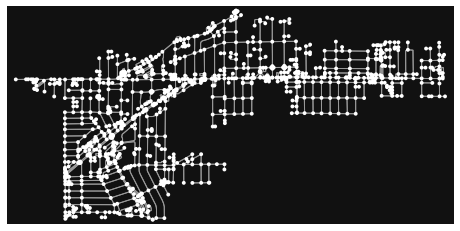

In [4]:
# plotting using osmnx
fig, ax = ox.plot_graph(G)

In [5]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [6]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [7]:
ints1 = ox.distance.nearest_nodes(G,Y=4039017.8956741537,X=-13177624.649093205)
print('The ID for the nearest node is ' + str(ints1))

The ID for the nearest node is 123230491


In [8]:
# using the lengths column (which is in meters) let's calculate and add another column for walk times
gdf_edges['walk_times'] = gdf_edges['length']/meters_per_minute

In [9]:
# adding colors to each trip time
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15]
['#0d0887', '#cc4778', '#f0f921']


In [10]:
# reversing order of colors so dark=long
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[15, 10, 5]
['#0d0887', '#cc4778', '#f0f921']


In [11]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(15, '#0d0887'), (10, '#cc4778'), (5, '#f0f921')]

In [12]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 15 minutes is #0d0887
The color for 10 minutes is #cc4778
The color for 5 minutes is #f0f921


In [16]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, ints1, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 367 nodes within 15 minutes 
There are 175 nodes within 10 minutes 
There are 40 nodes within 5 minutes 


In [14]:
# the NaN values then need to be populated with a valid color
gdf_nodes['color'].fillna('#cccccc', inplace=True)

<AxesSubplot:>

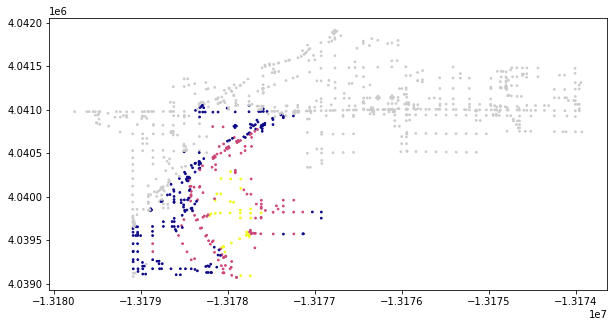

In [15]:
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

In [16]:
# show only the points within 5 minutes
gdf_nodes[gdf_nodes['time']=='5 mins']

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
122684997,4.039814e+06,-1.317761e+07,traffic_signals,4,-118.376519,34.081967,POINT (-13177613.772 4039813.549),5 mins,#f0f921
122684999,4.039809e+06,-1.317774e+07,NaN,4,-118.377613,34.081936,POINT (-13177735.600 4039809.356),5 mins,#f0f921
6765937728,4.039859e+06,-1.317774e+07,NaN,3,-118.377609,34.082306,POINT (-13177735.166 4039859.126),5 mins,#f0f921
2614047980,4.039754e+06,-1.317773e+07,NaN,4,-118.377605,34.081527,POINT (-13177734.654 4039754.425),5 mins,#f0f921
122685001,4.039811e+06,-1.317785e+07,NaN,4,-118.378675,34.081949,POINT (-13177853.811 4039811.049),5 mins,#f0f921
6765937733,4.039845e+06,-1.317785e+07,NaN,3,-118.378672,34.082203,POINT (-13177853.466 4039845.242),5 mins,#f0f921
2614048059,4.039756e+06,-1.317785e+07,NaN,3,-118.378677,34.081538,POINT (-13177854.033 4039755.876),5 mins,#f0f921
122685003,4.039813e+06,-1.317797e+07,NaN,4,-118.379725,34.081963,POINT (-13177970.674 4039812.998),5 mins,#f0f921
8460493197,4.039943e+06,-1.317797e+07,NaN,3,-118.379711,34.082932,POINT (-13177969.115 4039943.144),5 mins,#f0f921


In [17]:
# put it in a variable
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

<AxesSubplot:>

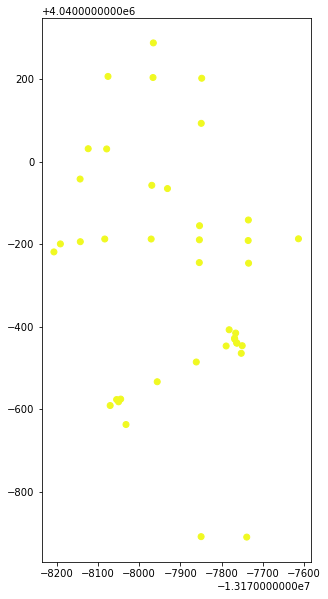

In [18]:
# plot it
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

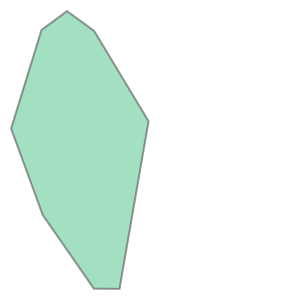

In [19]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_5.unary_union.convex_hull

In [20]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

,geometry,y,x,highway,street_count,lon,lat,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13178861.619 4039459.020, -131788...",4.039736e+06,-1.317850e+07,traffic_signals,3,-118.384501,34.081387,#cc4778
15 mins,"MULTIPOINT (-13179087.631 4039631.821, -131790...",4.039785e+06,-1.317852e+07,traffic_signals,3,-118.384677,34.081755,#0d0887
5 mins,"MULTIPOINT (-13178206.270 4039781.722, -131781...",4.039814e+06,-1.317761e+07,traffic_signals,4,-118.376519,34.081967,#f0f921


In [21]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13177896.802 4039070.742, -13178860..."
1,15 mins,"POLYGON ((-13178543.123 4039101.263, -13178590..."
2,5 mins,"POLYGON ((-13177739.107 4039090.767, -13177849..."


In [22]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

<AxesSubplot:>

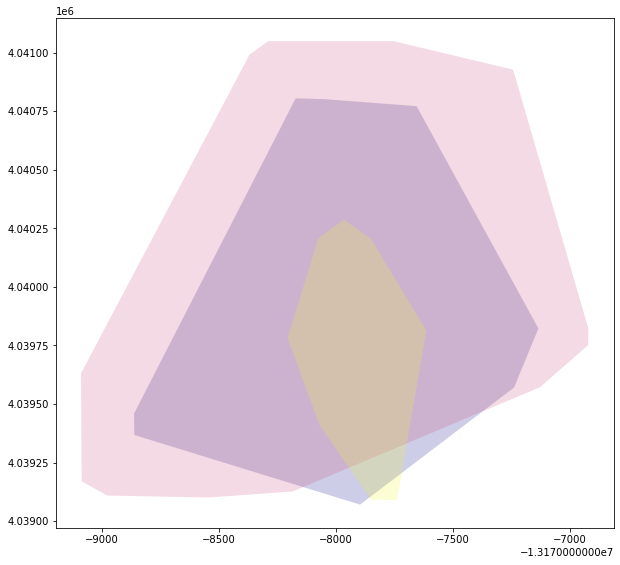

In [23]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

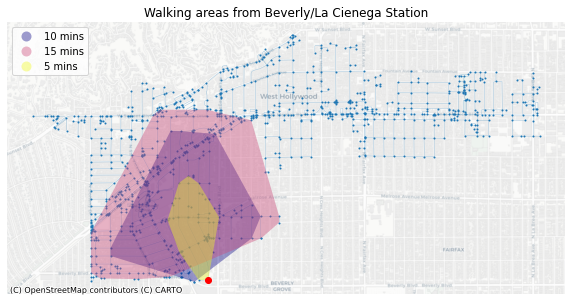

In [24]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[ints1]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from Beverly/La Cienega Station')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)